## Monte Carlo Simulation


In [6]:
import random
import math

### Pi Calculation

The idea is to randomly generate points within a square and determine how many fall in a circle inscribed by the square. By comparing the points inside the circle to the total number of points you can approximate the Pi number. Repeat your simulation with a different number of points and analyze their results.

In [140]:
def pi_estimator(num_points):
    points_in_circle = 0

    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        distance = math.sqrt(x**2 + y**2)

        if distance <= 1:
            points_in_circle += 1

    ratio= points_in_circle / num_points
    pi = 4 * (ratio)
    return pi

sample_sizes  = [10**3, 10**4, 10**5, 10**6,10**7,10**8]

for num_points in sample_sizes :
    pi_approx = pi_estimator(num_points)
    print(f"Number of points: {num_points} || Pi approximation: {pi_approx}")


Number of points: 1000 || Pi approximation: 3.036
Number of points: 10000 || Pi approximation: 3.1748
Number of points: 100000 || Pi approximation: 3.14348
Number of points: 1000000 || Pi approximation: 3.14078
Number of points: 10000000 || Pi approximation: 3.1416588
Number of points: 100000000 || Pi approximation: 3.1415742


The code utilizes a Monte Carlo simulation technique to estimate the value of π. This involves generating random points within a quarter circle inscribed in a square. The pi_estimator function is responsible for calculating the ratio of points within the circle, providing approximate values for π based on different quantities of generated points (ranging from ${10^3}$ to ${10^8}$). Notably, as the number of points increases, the precision of the π approximation improves. This highlight the method's effectiveness in converging towards the true value of Pi as the sample size grows.

In mathematical terms, the area of a square (A<sub>s</sub>) is 4, and the area of a circle (A<sub>c</sub>) can be represented by π. Therefore, the value of π can be expressed as 4 * (π/4) (A<sub>c</sub>/A<sub>s</sub>), where A<sub>c</sub> is the area of the circle, and A<sub>s</sub> is the area of the square.


### Mensch Game

We are going to analyze the simpler version of Mensch Game in which every player only has one piece in the game. So basically, every player only rolls dice in his turns and moves his piece So, everything is purely based on chance. We want to calculate the probability of winning for each of the 1st, 2nd, 3rd, and 4th players in this game. Perform the Monte Carlo Simulation over the speciﬁed game to calculate these probabilities.

**Game Rules:**
- To enter the game, a player must roll a 6.
- Rolling a 6 on the dice grants an extra roll.
- The winner is the player who has moved more than 36 steps.
- If a player occupies a location and another player arrives, the current player moves to an outer area until they roll another 6 to re-enter the game.

In [141]:
NOT_IN_GAME=-1

def roll_dice():
    return random.randint(1, 6)

def move_player(player_position, roll):
    player_position += roll
    return player_position

def check_collision(player_positions, players_in_game, current_player_index):
    for i in range(len(player_positions)):
        if i != current_player_index and player_positions[current_player_index] == player_positions[i]:
            player_positions[i] =NOT_IN_GAME
            players_in_game[i] = False

def roll_until_six(player_positions, players_in_game, i):
    while True:
        rolled_dice = roll_dice()
        player_positions[i] = move_player(player_positions[i], rolled_dice)
        check_collision(player_positions, players_in_game, i)
        if rolled_dice != 6:
            break


In [142]:
def play_game():
    num_players = 4
    players_start_positions = [i * 10 for i in range(0, num_players)]
    player_positions = [NOT_IN_GAME for i in range(0, num_players)]
    players_in_game = [False] * num_players

    while True:
        for i in range(num_players):
            rolled_dice=roll_dice()
            if not players_in_game[i]:
                if  rolled_dice == 6:
                    players_in_game[i] = True
                    player_positions[i] = move_player(players_start_positions[i], 0)
                    roll_until_six(player_positions, players_in_game, i)

            else:
                roll_until_six(player_positions, players_in_game, i)  
                
            if player_positions[i]-players_start_positions[i] > 36:
                return i 

In [145]:
def monte_carlo_simulation(num_simulations):
    wins = [0] * 4
    for _ in range(num_simulations):
        winner = play_game()
        wins[winner] += 1
    
    probabilities = [win / num_simulations for win in wins]
    return probabilities

NUM_SIMULATIONS = 10**6
probabilities = monte_carlo_simulation(NUM_SIMULATIONS)

print(f"Number of runs : {NUM_SIMULATIONS}")
for i, prob in enumerate(probabilities):
    print(f"Player {i+1}: Probability of winning = {prob*100:.3f}%")

Number of runs : 1000000
Player 1: Probability of winning = 26.022%
Player 2: Probability of winning = 24.448%
Player 3: Probability of winning = 24.289%
Player 4: Probability of winning = 25.241%


As we may expect, Player 1 has the highest probability of winning the game. This aligns with the common understanding that the starting player often has an advantage in board games like Mensch due to being the first to make moves and potentially set the pace of the game.

## Central Limit Theorem(CLT)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Chosen Distributions

The probability distributions have been chosen are exponential, uniform and beta. Each of them has their own parameters which are defined as constant and global variable. By having them we can calculate mean and variance of these distributions.

Exponential Distribution:
- Probability Density Function (PDF):

$$
f(x|\lambda) = \lambda e^{-\lambda x}, \quad x \geq 0
$$
- Mean:
$$
\mu = \frac{1}{\lambda}
$$
- Variance:
$$
\sigma^2 = \frac{1}{\lambda^2}
$$

Uniform Distribution:
- Probability Density Function (PDF):
$$
f(x|a,b) = \frac{1}{b-a}, \quad a \leq x \leq b
$$
- Mean:
$$
\mu = \frac{a+b}{2}
$$
- Variance:
$$
\sigma^2 = \frac{(b-a)^2}{12}
$$

Beta Distribution:
- Probability Density Function (PDF):
$$
f(x|a,b) = \frac{x^{a-1}(1-x)^{b-1}}{B(a,b)}, \quad 0 \leq x \leq 1
$$
Where \(B(a,b)\) is the beta function.
- Mean:
$$
\mu = \frac{a}{a+b}
$$
- Variance:
$$
\sigma^2 = \frac{ab}{(a+b)^2(a+b+1)}
$$



In [4]:
SAMPLE_NUMBER = 1000

LOW = 0
HIGH = 10
LAMDA = 1
ALPHA = 2
BETA = 5

### Mean and Variance Value with given parametes

Let's define the parameters for the distributions:
\begin{align*}
\text{LOW} &= 0 \\
\text{HIGH} &= 10 \\
\lambda &= 1 \\
\alpha &= 2 \\
\beta &= 5 \\
\end{align*}

Exponential Distribution
For the exponential distribution with parameter $\lambda$, the mean and variance are given by:
\begin{align*}
\text{Mean} &= \frac{1}{\lambda} = \frac{1}{1} = 1 \\
\text{Variance} &= \frac{1}{\lambda^2} = \frac{1}{1^2} = 1 \\
Central Limit Theorem (CLT): 
\text{Mean} &= \mu = \frac{1}{\lambda} = 1 \\
\text{Variance} &= \frac{\sigma^2}{n} = \frac{1}{n}
\end{align*}

Uniform Distribution
For the uniform distribution over the interval $[a, b]$, the mean and variance are given by:
\begin{align*}
a &= \text{LOW} = 0 \\
b &= \text{HIGH} = 10 \\
\text{Mean} &= \frac{a + b}{2} = \frac{0 + 10}{2} = 5 \\
\text{Variance} &= \frac{(b - a)^2}{12} = \frac{(10 - 0)^2}{12} = \frac{100}{12} = \frac{25}{3} \\
Central Limit Theorem (CLT):
\text{Mean} &= \mu = \frac{a + b}{2} = 5 \\
\text{Variance} &= \frac{\sigma^2}{n} = \frac{(b - a)^2}{12n} = \frac{25}{3n}
\end{align*}

Beta Distribution
For the beta distribution with parameters $\alpha$ and $\beta$, the mean and variance are given by:
\begin{align*}
\alpha &= 2 \\
\beta &= 5 \\
\text{Mean} &= \frac{\alpha}{\alpha + \beta} = \frac{2}{2 + 5} = \frac{2}{7} \\
\text{Variance} &= \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} = \frac{2 \times 5}{(2 + 5)^2(2 + 5 + 1)} = \frac{10}{49} \\
Central Limit Theorem (CLT):
\text{Mean} &= \mu = \frac{\alpha}{\alpha + \beta} = \frac{2}{2 + 5} = \frac{2}{7} \\
\text{Variance} &= \frac{\sigma^2}{n} = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)n}
\end{align*}

### Exploring the CLT Through Distributions Sampling
<b>clt_generator(sample_size:int):</b>
   - This function generates sample means from three different distributions: exponential, uniform, and beta.
   - It takes a parameter `sample_size` which indicates the number of samples to be generated for each distribution.
   - Inside the function, samples are generated using NumPy's random functions (`np.random.uniform`, `np.random.exponential`, and `np.random.beta`) with parameters defined by global variables (`LOW`, `HIGH`, `LAMDA`, `ALPHA`, and `BETA`).
   - For each distribution, the mean of the generated samples is calculated and stored in separate lists (`exponential_means`, `uniform_means`, and `beta_means`).
   - These mean values are then combined into a DataFrame named `sample_means`.
   - Finally, the DataFrame `sample_means` containing the mean values for each distribution is returned.


<b>plotting(df, sample_size:int):</b>
   - This function plots histograms of the sample means generated by `clt_generator` for each distribution.
   - It takes two parameters: `df`, which is the DataFrame containing the sample means, and `sample_size`, indicating the number of samples used to generate these means.
   - Inside the function, histograms for each column (distribution) in the DataFrame `df` are plotted using Matplotlib.
   - For each distribution, the mean and variance of the sample means are calculated and printed as captions below their respective histograms.


These functions together are used to demonstrate the Central Limit Theorem (CLT) by generating and plotting sample means from different distributions for varying sample sizes. The `clt_generator` function generates the sample means, and the `plotting` function visualizes these sample means in histograms along with their calculated mean and variance.

In [2]:
def clt_generator(sample_size:int):
    
    exponential_means = []
    uniform_means = []
    beta_means = []
    
    for i in range(SAMPLE_NUMBER):
        
        #Generate samples from different distributions
        uniform_samples = np.random.uniform(LOW, HIGH, sample_size)
        exponential_samples = np.random.exponential(1/LAMDA, sample_size)
        beta_samples = np.random.beta(ALPHA, BETA, sample_size)

        uniform_means.append(np.mean(uniform_samples))
        exponential_means.append(np.mean(exponential_samples))
        beta_means.append(np.mean(beta_samples))
        

    sample_means = pd.DataFrame({
        'exponential': exponential_means,
        'uniform': uniform_means,
        'beta': beta_means
    })
    
    return sample_means;

def plotting(df, sample_size:int):
    fig, axs = plt.subplots(1, len(df.columns), figsize=(15, 4))
    print("Sample size : ", sample_size)
    
    for i, col in enumerate(df.columns):
        axs[i].hist(df[col], color='C{}'.format(i))
        axs[i].set_title(col)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        
        caption=str(col)+": mean: "+str("{:.5f}".format(df[col].mean()))+", variance: "+str("{:.5f}".format(df[col].var()))
        print(caption)
        

    plt.tight_layout()
    
    plt.show()

Sample size :  1
exponential: mean: 1.00922, variance: 0.98939
uniform: mean: 5.07328, variance: 8.90631
beta: mean: 0.29376, variance: 0.02673


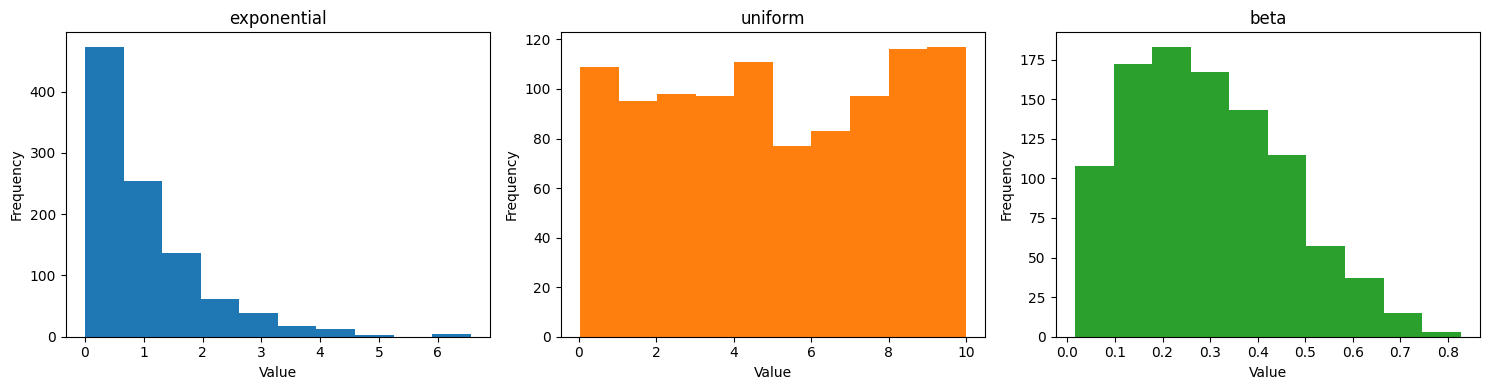

Sample size :  4
exponential: mean: 1.01804, variance: 0.24682
uniform: mean: 4.96830, variance: 2.05537
beta: mean: 0.28881, variance: 0.00652


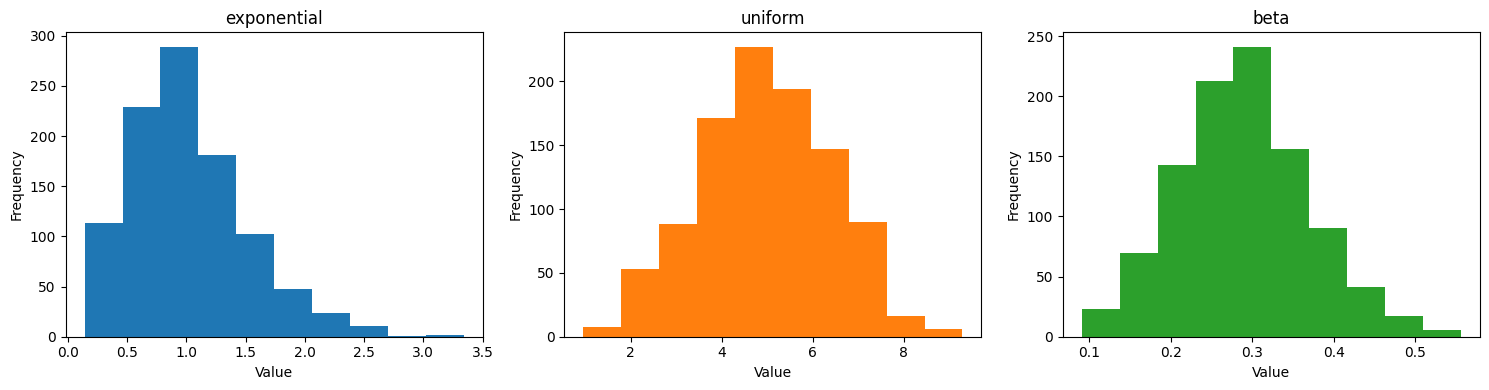

Sample size :  10
exponential: mean: 0.99488, variance: 0.10078
uniform: mean: 4.99924, variance: 0.90429
beta: mean: 0.28454, variance: 0.00257


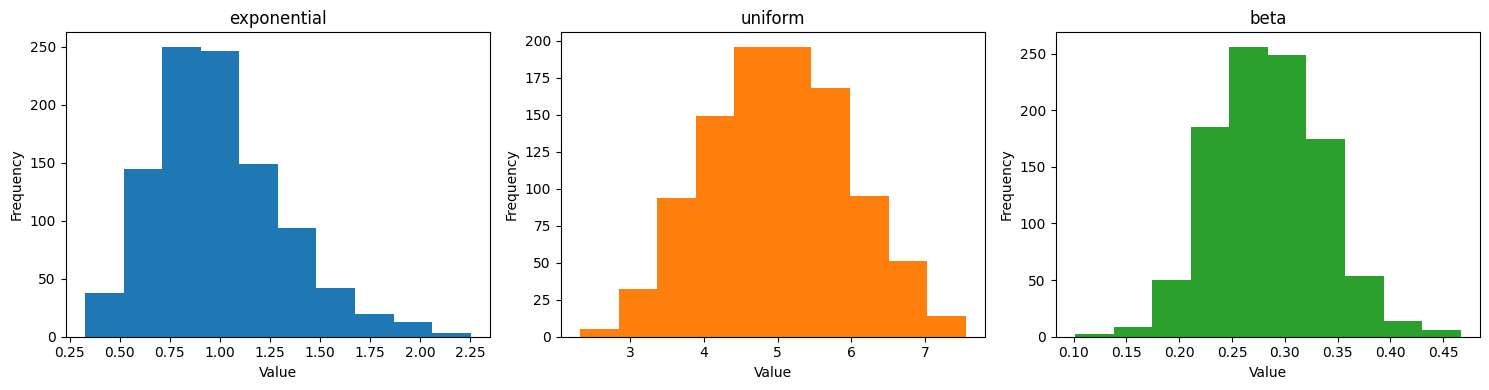

Sample size :  50
exponential: mean: 0.99845, variance: 0.01899
uniform: mean: 4.98259, variance: 0.16699
beta: mean: 0.28581, variance: 0.00052


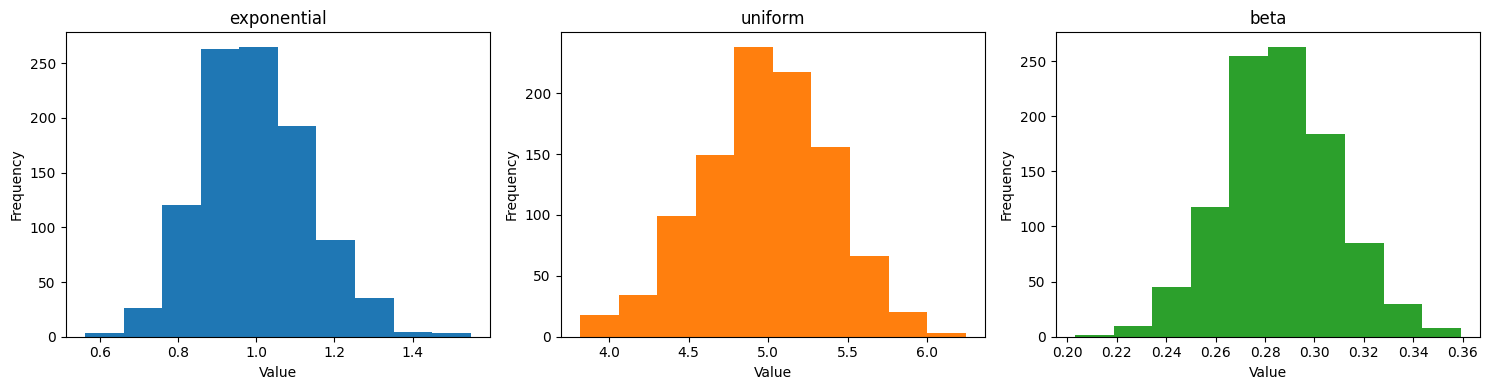

Sample size :  100
exponential: mean: 0.99533, variance: 0.00931
uniform: mean: 5.00967, variance: 0.08671
beta: mean: 0.28596, variance: 0.00027


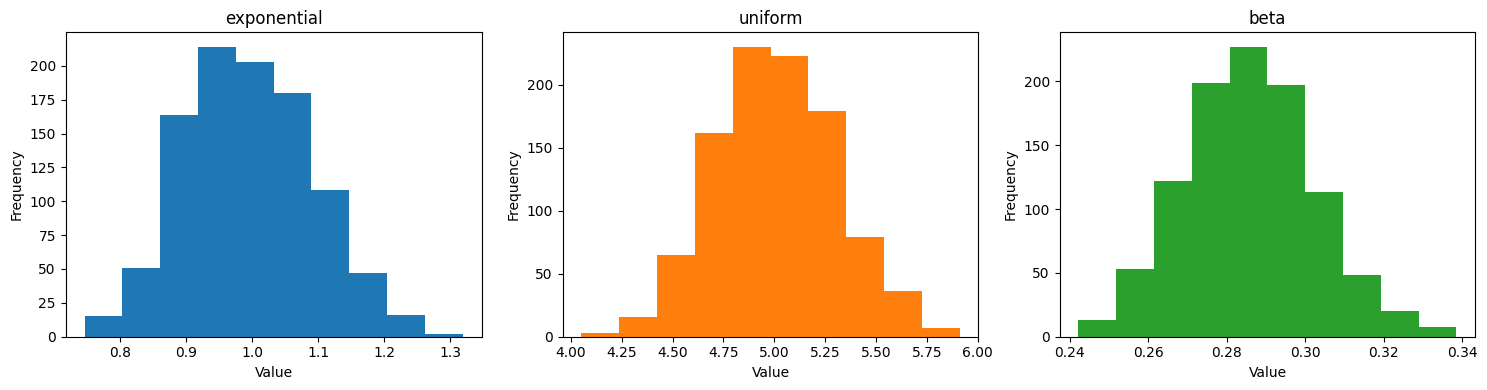

Sample size :  100000
exponential: mean: 1.00005, variance: 0.00001
uniform: mean: 4.99956, variance: 0.00008
beta: mean: 0.28572, variance: 0.00000


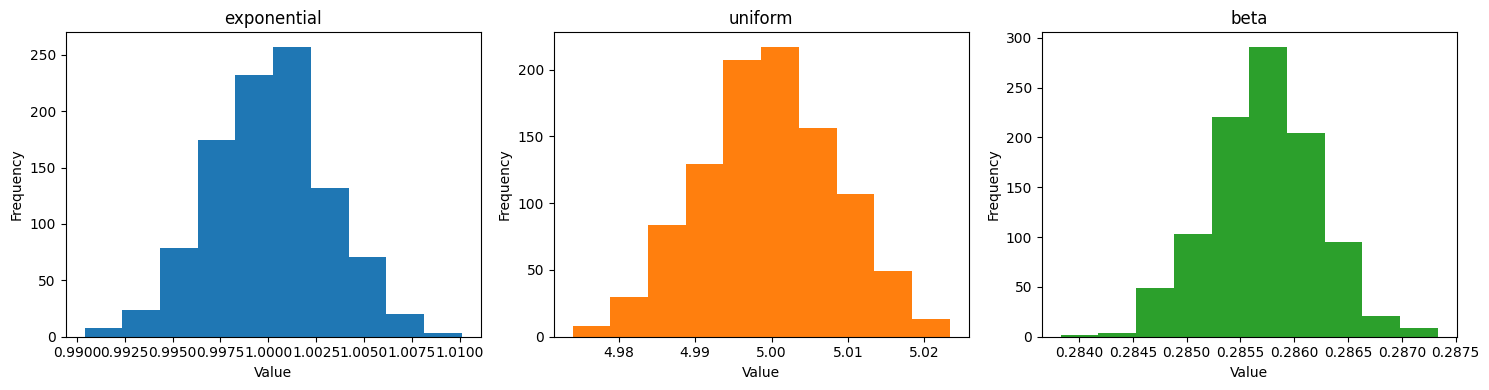

In [9]:
testing_sample_sizes = [1, 4, 10 , 50, 100,100000]

for size in testing_sample_sizes:
    plotting(clt_generator(size), size)

## Hypothesis Testing

### Unfair Coin

Here, we tried to simulate an unfair coin that lands heads with a probability of 0.53. In other words, it's about 10% more probable to see heads landed. We flipped it 30 times, 100 times, 1000 times, and 10000 times and tried to guess the probability of landing heads.

 Our null hypothesis was that the probability of seeing heads or tail is equal. 
 
 The more times we flipped the coin, the higher chance the null hypothesis was rejected. In general, increasing the sample size makes the test more powerful.

 With a larger sample, the estimate of the population mean for each group will be more precise. This reduces the standard error and makes small differences between the true population means more likely to be statistically significant (This answeres the question number 3). We ran this test 1000 times to demonstrate this better. We counted how many times the null hypothesis was rejected for different sample sizes. The confidence interval is set to 95 percent for both 'Unfair Coin' and 'Job Placement' problems.


In [10]:
import numpy as np
from scipy import stats

hypothesis = 0.5
TOTAL_NUM_RUN = 1000
SIGNIFICANCE_LEVEL = 0.05
PROB_HEAD = 0.53
PROB_TAILS = 0.47

In [27]:
import numpy as np
from scipy import stats

hypothesis = 0.5
TOTAL_NUM_RUN = 1000
SIGNIFICANCE_LEVEL = 0.05
PROB_HEAD = 0.53
PROB_TAILS = 0.47


def conduct_hypothesis_test(sample_size, reject_counts, index,preview):
    flips = np.random.choice(['H', 'T'], size=sample_size, p=[PROB_HEAD, PROB_TAILS])
    
    num_heads = np.count_nonzero(flips == 'H')
    
    p_hat = num_heads / sample_size
    se = np.sqrt(p_hat * (1 - p_hat) / sample_size) #Sqrt(PQ/N)
    
    z_score = (p_hat - hypothesis) / se
    
    if(z_score > 0):
        p_value = 2 * (1 - stats.norm.cdf(z_score))
    else:
        p_value = 2 * stats.norm.cdf(abs(z_score))
        
    if p_value < SIGNIFICANCE_LEVEL:
        decision = "Reject the null hypothesis"
        reject_counts[index] += 1
    else:
        decision = "Fail to reject the null hypothesis"
    if(preview==1):
        print("Sample size:", sample_size)
        print("Number of Heads:", num_heads)
        print("Sample proportion (p-hat):", p_hat)
        print("Standard error (SE):", se)
        print("Z-score:", z_score)
        print("P-value:", p_value)
        print("Decision:", decision)
        print()


sample_sizes = [30, 100, 1000, 10000]
reject_count = [0, 0, 0, 0]
for i in range(0, TOTAL_NUM_RUN):
    for j in range(len(sample_sizes)):
        conduct_hypothesis_test(sample_sizes[j], reject_count, j,i)



Sample size: 30
Number of Heads: 15
Sample proportion (p-hat): 0.5
Standard error (SE): 0.09128709291752768
Z-score: 0.0
P-value: 1.0
Decision: Fail to reject the null hypothesis

Sample size: 100
Number of Heads: 53
Sample proportion (p-hat): 0.53
Standard error (SE): 0.04990991885387112
Z-score: 0.6010829247756464
P-value: 0.5477847557024209
Decision: Fail to reject the null hypothesis

Sample size: 1000
Number of Heads: 528
Sample proportion (p-hat): 0.528
Standard error (SE): 0.015786576576319513
Z-score: 1.7736587704519249
P-value: 0.07611961010204138
Decision: Fail to reject the null hypothesis

Sample size: 10000
Number of Heads: 5347
Sample proportion (p-hat): 0.5347
Standard error (SE): 0.004987944566652681
Z-score: 6.956773383567591
P-value: 3.481437360619566e-12
Decision: Reject the null hypothesis



In [10]:
print("number of times the null hypothesis has got rejected:")
for i in range(len(sample_sizes)):
    print(f"sample size: {sample_sizes[i]}")
    print(f"null hypothesis rejected {reject_count[i]} times ({(reject_count[i]/TOTAL_NUM_RUN)*100}%)")
    print("----------------------------")

number of times the null hypothesis has got rejected:
sample size: 30
null hypothesis rejected 43 times (4.3%)
----------------------------
sample size: 100
null hypothesis rejected 107 times (10.7%)
----------------------------
sample size: 1000
null hypothesis rejected 498 times (49.8%)
----------------------------
sample size: 10000
null hypothesis rejected 1000 times (100.0%)
----------------------------


### Job Placement

#### Methodology:

The dataset was read using Pandas and students were split into two groups based on their job placement status - Employed and Not Employed.

For each group, the mean GPA, standard deviation and sample size was calculated.

The t-statistic was calculated using the formula:
$$ tstatistic = \frac{(\mu(Employed) - \mu(Not Employed))}{Pooled  Standard  Deviation} $$
Where, $$ Pooled Standard Deviation = \sqrt{\frac{\sigma(Employed)^{2}}{n(Employed)} + \frac{\sigma(Not Employed)^{2}}{n(Not Employed)}} $$

Degrees of freedom was calculated as (total number of students - 2).

P-value was determined using the t-distribution from SciPy library for the calculated t-statistic and degrees of freedom.

The null hypothesis is: Working alongside studying has negative impact on student's grades.
The alternative hypothesis is: Working alongside studying has positive or no impact on student's grades (That's why we didn't multiply the p-value by 2 because it's a one-tailed test).

As the p-value was way smaller that alpha (which is 0.05 as our confidence interval is 95 percent), we reject the null hypothesis (well, if a student makes money alongside studying, he'll be much more delightful in his/her life, I guess).

The histogram of each group's GPA is also portrayed, but as the dof (degree of freedom) of both groups is too big (bigger than 150), they are almost identical and converge to normal distribution.

Employed students' average GPA : 3.76140350877193
Not employed students' average GPA : 3.702307692307692
Employed students' standard deviation : 0.11335184963393793
Not employed students' standard deviation : 0.14167622472930308
T_stat : 4.442633347555541
Degree of Freedom : 698


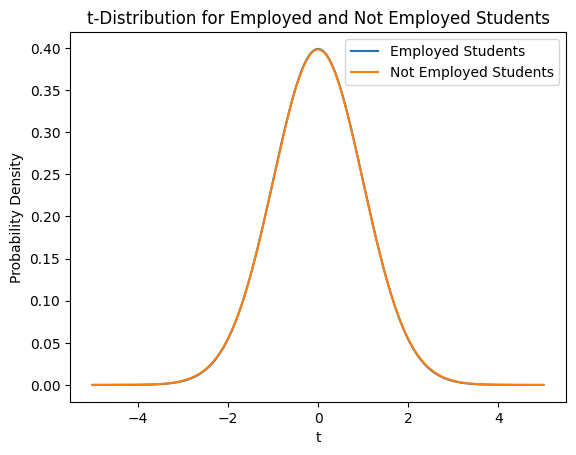

P-value : 5.165578960020234e-06
Rejecting the null hypothesis


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

df = pd.read_csv("job_placement.csv")

employed_students = df[df["placement_status"] == "Placed"]
not_employed_students = df[df["placement_status"] == "Not Placed"]

df[["placement_status", "gpa"]].to_csv("test.csv")

def t_distribution(employed_students, not_employed_students, title):
    mean_employed = np.mean(employed_students)
    mean_not_employed = np.mean(not_employed_students)
    std_employed = np.std(employed_students, ddof=1)
    std_not_employed = np.std(not_employed_students, ddof=1)
    n_employed = len(employed_students)
    n_not_employed = len(not_employed_students)
    
    print(f"Employed students' average GPA : {mean_employed}")
    print(f"Not employed students' average GPA : {mean_not_employed}")
    print(f"Employed students' standard deviation : {std_employed}")
    print(f"Not employed students' standard deviation : {std_not_employed}")
    
    t_stat = (mean_employed - mean_not_employed) / np.sqrt((std_employed ** 2) / n_employed + (std_not_employed ** 2) / n_not_employed)
    dof = n_employed + n_not_employed - 2
    
    print(f"T_stat : {t_stat}")
    print(f"Degree of Freedom : {dof}")
    
    dof_employed = len(employed_students) - 1
    dof_not_employed = len(not_employed_students) - 1
    
    x_employed = np.linspace(-5, 5, 500)
    x_not_employed = np.linspace(-5, 5, 500)
    pdf_employed = t.pdf(x_employed, dof_employed)
    pdf_not_employed = t.pdf(x_not_employed, dof_not_employed)
    plt.plot(x_employed, pdf_employed, label='Employed Students')
    plt.plot(x_not_employed, pdf_not_employed, label='Not Employed Students')
    plt.xlabel('t')
    plt.ylabel('Probability Density')
    plt.title('t-Distribution for Employed and Not Employed Students')
    plt.legend()
    plt.show()
    
    p_value = 1 - t.cdf(t_stat, dof)
    print(f"P-value : {p_value}")
    
    if(p_value < 0.05):
        print("Rejecting the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")
    
t_distribution(employed_students["gpa"].values, not_employed_students["gpa"].values, "GPA")



T-statistic: 5.105318956468754
P-value: 4.2636444940967887e-07
Rejecting the null hypothesis


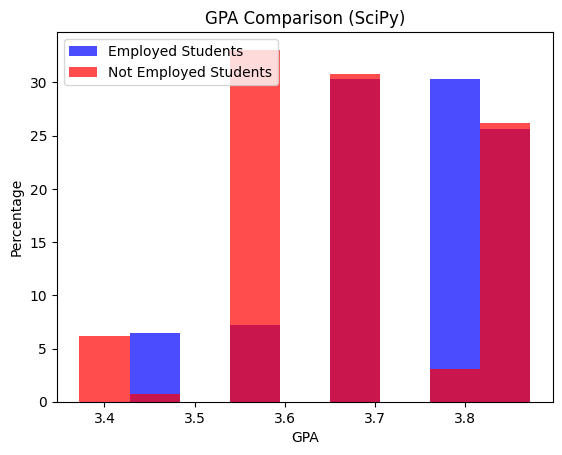

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


def t_test_scipy(employed_students, not_employed_students, title):
    employed_gpa = employed_students["gpa"].values
    not_employed_gpa = not_employed_students["gpa"].values
    
    t_stat, p_value = ttest_ind(employed_gpa, not_employed_gpa)
    
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("Rejecting the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")
    
    bins = np.linspace(min(min(employed_gpa), min(not_employed_gpa)), max(max(employed_gpa), max(not_employed_gpa)), num=10)
    employed_counts, _ = np.histogram(employed_gpa, bins=bins)
    not_employed_counts, _ = np.histogram(not_employed_gpa, bins=bins)
    
    total_employed = len(employed_gpa)
    total_not_employed = len(not_employed_gpa)
    
    employed_percentages = employed_counts / total_employed * 100
    not_employed_percentages = not_employed_counts / total_not_employed * 100
    
    plt.title(title)
    plt.bar(bins[:-1], employed_percentages, width=np.diff(bins), alpha=0.7, color="blue", label='Employed Students')
    plt.bar(bins[:-1], not_employed_percentages, width=np.diff(bins), alpha=0.7, color="red", label='Not Employed Students')
    plt.xlabel('GPA')
    plt.ylabel('Percentage')
    plt.legend()
    plt.show()

t_test_scipy(employed_students, not_employed_students, "GPA Comparison (SciPy)")

The t-statistic and p-value are slightly different between the two implementations because:

In the first implementation, we calculated the t-statistic manually by calculating means, standard deviations, sample sizes etc. The SciPy implementation calculates it internally using some optimized algorithms.

The manual calculation involves rounding off errors at different steps like calculating mean, variance etc. The SciPy implementation avoids such round-off errors by using high precision arithmetic internally.

When calculating standard error in the manual approach, we are using a formula that assumes variances are equal across groups. SciPy doesn't make this assumption and calculates an appropriate standard error even if variances differ.

SciPy uses more precise t-distribution calculations for arriving at the p-value compared to approximating it based on degrees of freedom like in the manual approach.

## Questions:


**1. Read a little bit about the applications of Monte Carlo Simulation in real life. What are
some of these applications?**


Monte Carlo simulation offers a method to forecast future stock prices by treating them as stochastic processes. In the realm of option pricing theory, stock prices are typically modeled as following a Geometric Brownian motion, characterized by a certain drift and variance level. Through the generation of numerous simulations, often numbering in the thousands or millions, and subsequently averaging the outcomes, one can derive a reliable estimate of the forthcoming stock price, contingent upon the validity of the underlying model.
We also conduct Monte Carlo simulations for emission tomography and other medical imaging techniques in healthcare.

**2. How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?**

As the sample size increases, notable trends emerge:
- The mean and variance of sample means get closer to CLT formula.
- The distributions get closer to normal distribitions.  

**3. How does increasing the sample size affect your coin test?**

The more times we flipped the coin, the higher chance the null hypothesis was rejected. In general, increasing the sample size makes the test more powerful. With a larger sample, the estimate of the population mean for each group will be more precise. This reduces the standard error and makes small differences between the true population means more likely to be statistically significant.

__4. What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they
help us to compare two data sets?__
- t-statistic:

   - It is a test statistic that quantifies the separation between the means of two groups, adjusted for sample size. The t-statistic tells us whether the means of the two groups are statistically different from each other. It is calculated as the difference between the two sample means divided by the standard error. A higher absolute t-statistic provides stronger evidence to reject the null hypothesis of no difference between the groups.

- Degrees of freedom:

   - It represents the number of values in the final calculation of a statistic that are free to vary.
    For a two-sample t-test, degrees of freedom is calculated as total number of observations across both groups minus 2.
    Degrees of freedom affects the shape and properties of the t-distribution.

- t-distribution:

    - The t-distribution is the theoretical distribution of the t-statistic under the null hypothesis.
    It has heavier tails than the normal distribution, making it suitable for tests involving small sample sizes.
    We use the t-distribution to find the p-value corresponding to the calculated t-statistic and degrees of freedom.
    This allows us to determine the probability of observing our sample results, if the null hypothesis was in fact true.

__5. What are the preliminary conditions for using t-test on our data?__

There are a few key preliminary conditions that should be checked before applying a t-test on the data:

Independent samples: The observations in each sample should be independent of each other. This ensures independence of observations. Here, each student's grade is independent of the others.

Random sampling: The samples should be randomly selected from the population. This ensures they are representative of the overall population. 

Normal distribution: The data in each sample should be approximately normally distributed. This is needed because t-test relies on t-distribution.

Homogeneity of variance: The variances of the populations from which the samples are drawn should be approximately equal. This is known as homoscedasticity.

Sample size: Each sample should have at least 30 or more observations for central limit theorem to take effect and ensure t-distribution works well.

Level measurement: The dependent variable (eg. GPA) should be measured on at least an interval scale.

No significant outliers: Each sample should not contain any significant outliers which can influence the test output


__6. Read about some other types of tests that are used in scientiﬁc research. Write a line
about each of them.__


Here are some other common statistical tests used in scientific research:

- ANOVA (Analysis of Variance) - Compares mean differences between two or more groups. Extension of t-test for more than two groups. 

- Chi-squared test - Used for examining relationships between categorical/qualitative variables. Compares observed frequencies to expected frequencies.

- Regression analysis - Used to analyze relationships between variables and build prediction models. Assesses impact of independent variables on dependent variable. 

- Logistic regression - Regression for predicting categorical outcome variables. Useful for classification problems. 

- Nonparametric tests - Tests that make no assumptions about population distribution. Used when parametric test assumptions are violated.

- Survival analysis - Analyzes time-to-event data where the event of interest is not always observed. Helps understand how predictor variables impact time to event. 

- Multivariate analysis - Techniques like MANOVA/MANCOVA analyze relationships between multiple dependent variables and independents simultaneously while accounting for dependencies. 

